In [2]:
import math
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import os
import glob
import datetime
import copy

In [14]:
#could have other hyperparameters in main

def ewma_returns(stocks):
    dates = set()
    filenames = []
    #for filename in os.listdir("./SP500Stocks"):
    for filename in os.listdir("./SmallStocks"):
        if len(stocks) == 0:
            if "csv" in filename:
                filenames.append(filename)
        else:
            if "csv" in filename and filename[:-4] in stocks:
                filenames.append(filename)
    #format for consolidate info is {name: {dates: {date, open}, }}
    Histories = {}
    Exp_weighted = {}
    for file in filenames:
        
        #with open("SP500Stocks/"+file, 'r') as f:
        with open("SmallStocks/"+file, 'r') as f: 
            reader = csv.reader(f)
            next(reader)  # gets the first line
            previousClose = next(reader)[4]
            
            history = {}

            for row in reader:

                dates.add(row[0])
     
                try:
                    history[row[0]] = (float(row[4])-float(previousClose))/float(previousClose)*100
                except:
                    pass
                previousClose = row[4]
                
                
                #exp_avg=df.ewm(span=30,adjust=False, ignore_na=True).mean()
                #history[row[1]] = exp_avg
            #df = pd.DataFrame.from_dict(history)
            
            #test = range(len(history.keys()))
            df = pd.DataFrame(data = history, index = ['returns']).transpose()
            #print(df)
            exp_avg=df.ewm(span = 30, min_periods=30, ignore_na=True).mean()
            
            exp_avg = exp_avg['returns'].values
            a = list(df.index)
            exp_avg_dict = {}
            exp_avg_dict = dict(zip(a,exp_avg))
            
            pop_list = []
            
            for key in exp_avg_dict.keys():
                if math.isnan(exp_avg_dict[key]):
                    pop_list.append(key)
                    
            for key in pop_list:
                exp_avg_dict.pop(key)

            
            Exp_weighted[file[:-4]] = exp_avg_dict
            
            Histories[file[:-4]] = history
            
            #break  
            
    sortedDates = [date for date in dates]
    sortedDates = sorted(sortedDates, key=lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
    return Histories, sortedDates, Exp_weighted


In [15]:
a,b,c = ewma_returns([])

In [16]:
def highest_returns(input_dict):
    
    portfolio = 100
    portfolio_tracker = []
    for date in input_dict['A'].keys():
        daily_returns_dict = {}
        long_trading_list = []
        short_trading_list = []
        try:
            for ticker in input_dict.keys():
                daily_pct_return = input_dict[ticker][date]
                daily_returns_dict[ticker] = daily_pct_return
        except:
            pass
        
        float_list = []
        
        for i in daily_returns_dict.keys():
            float_list.append(float(daily_returns_dict[i]))
            
        for i in daily_returns_dict.keys():
            if float(daily_returns_dict[i]) >np.percentile(float_list, 95):
                long_trading_list.append(i)
            #if float(daily_returns_dict[i]) <np.percentile(float_list, 5):
                #short_trading_list.append(i)
                
        trades = len(long_trading_list) + len(short_trading_list)
        #print(long_trading_list)
        #print(short_trading_list)
        trade_cap = portfolio/trades
        #print(trade_cap)
        total = 0
        try:
            date_index = b.index(date)
            new_date = b[date_index+1]
        
            for i in long_trading_list:
                total += trade_cap *(1+float(a[i][new_date])/100)
            for i in short_trading_list:
                total += trade_cap *(1-float(a[i][new_date])/100)
                
        except:
            pass
        portfolio_tracker.append(total)
        portfolio = total
        #break
        #print(date) 
        #print(portfolio_tracker)
    return portfolio_tracker[:-1]
            
            
                






In [17]:
f = highest_returns(c)

Text(0, 0.5, 'Profits')

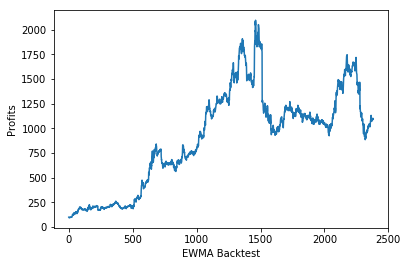

In [18]:
length = len(f)
timesteps = [j for j in range(length)]
plt.plot(timesteps, f)
plt.xlabel('EWMA Backtest')
plt.ylabel('Profits')

In [19]:
def ma_returns(stocks):
    dates = set()
    filenames = []
    #for filename in os.listdir("./SP500Stocks"):
    for filename in os.listdir("./SmallStocks"):
        if len(stocks) == 0:
            if "csv" in filename:
                filenames.append(filename)
        else:
            if "csv" in filename and filename[:-4] in stocks:
                filenames.append(filename)
    #format for consolidate info is {name: {dates: {date, open}, }}
    Histories = {}
    normal_weighted = {}
    for file in filenames:
        
        #with open("SP500Stocks/"+file, 'r') as f:
        with open("SmallStocks/"+file, 'r') as f: 
            reader = csv.reader(f)
            next(reader)  # gets the first line
            previousClose = next(reader)[4]
            
            history = {}

            for row in reader:

                dates.add(row[0])
     
                try:
                    history[row[0]] = (float(row[4])-float(previousClose))/float(previousClose)*100
                except:
                    pass
                previousClose = row[4]
                
                
                #exp_avg=df.ewm(span=30,adjust=False, ignore_na=True).mean()
                #history[row[1]] = exp_avg
            #df = pd.DataFrame.from_dict(history)
            
            #test = range(len(history.keys()))
            df = pd.DataFrame(data = history, index = ['returns']).transpose()
            #print(df)
            mov_avg=df.rolling(30, min_periods=30).mean()
            
            mov_avg = mov_avg['returns'].values
            a = list(df.index)
            mov_avg_dict = {}
            mov_avg_dict = dict(zip(a,mov_avg))
            
            pop_list = []
            
            for key in mov_avg_dict.keys():
                if math.isnan(mov_avg_dict[key]):
                    pop_list.append(key)
                    
            for key in pop_list:
                mov_avg_dict.pop(key)

            
            normal_weighted[file[:-4]] = mov_avg_dict
            
            Histories[file[:-4]] = history
            
            #break  
            
    sortedDates = [date for date in dates]
    sortedDates = sorted(sortedDates, key=lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
    return Histories, sortedDates, normal_weighted

q,r,s = ma_returns([])


Text(0, 0.5, 'Profits')

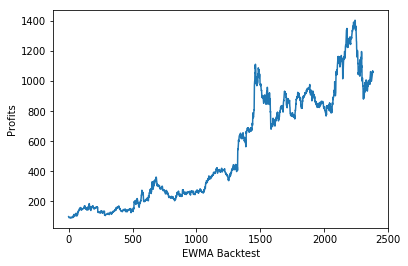

In [20]:
g = highest_returns(s)
length = len(g)
timesteps = [j for j in range(length)]
plt.plot(timesteps, g)
plt.xlabel('EWMA Backtest')
plt.ylabel('Profits')

In [36]:
import statistics as st
def sharpe(portfolio):
    daily_percent_return = []
    for i in range(1,len(portfolio)):
        daily_return = (portfolio[i]-portfolio[i-1])/portfolio[i-1]
        daily_percent_return.append(daily_return)
        
    stdev = st.pstdev(daily_percent_return)
    annualized_vol = math.sqrt(252) * stdev
    
    total_return = (portfolio[-1]-portfolio[0])/portfolio[0] 
    annualized_return = (1+total_return) ** (252/len(portfolio)) - 1
        
    return annualized_return/annualized_vol

def sortino(portfolio):
    daily_percent_return = []
    for i in range(1,len(portfolio)):
        daily_return = (portfolio[i]-portfolio[i-1])/portfolio[i-1]
        daily_percent_return.append(daily_return)
        
    #print(daily_percent_return)
    daily_negative_return = []
    for i in (daily_percent_return):
        
        if i < 0:
            daily_negative_return.append(i)
            
    #print(daily_negative_return)
    stdev = st.pstdev(daily_negative_return)
    annualized_vol = math.sqrt(252) * stdev
    
    total_return = (portfolio[-1]-portfolio[0])/portfolio[0] 
    annualized_return = (1+total_return) ** (252/len(portfolio)) - 1
        
    return (annualized_return-.03)/annualized_vol

In [37]:
print(sharpe(f))
print(sortino(f))

0.7600893909533325
0.9260404257485669


In [38]:
print(g[-1])
print(f[-1])

1058.8390931938939
1091.1775108131262


In [39]:
print(sharpe(g))
print(sortino(g))

0.7389891060978748
0.9723954319079523


Text(0, 0.5, 'Profits')

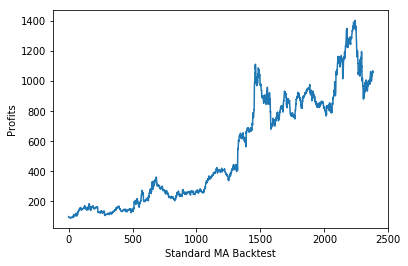

In [40]:
length = len(g)
timesteps = [j for j in range(length)]
plt.plot(timesteps, g)
plt.xlabel('Standard MA Backtest')
plt.ylabel('Profits')

In [42]:
#hyperparameter testing
#parameters - rolling window size, top quintile size, cutoff value
#train on 1900 days, test on 500

#takes in window size
def ewma_returns1(stocks,window_size):
    dates = set()
    filenames = []
    #for filename in os.listdir("./SP500Stocks"):
    for filename in os.listdir("./SmallStocks"):
        if len(stocks) == 0:
            if "csv" in filename:
                filenames.append(filename)
        else:
            if "csv" in filename and filename[:-4] in stocks:
                filenames.append(filename)
    #format for consolidate info is {name: {dates: {date, open}, }}
    Histories = {}
    Exp_weighted = {}
    for file in filenames:
        
        #with open("SP500Stocks/Filtered/"+file, 'r') as f:
        with open("SmallStocks/"+file, 'r') as f: 
            reader = csv.reader(f)
            next(reader)  # gets the first line
            previousClose = next(reader)[4]
            
            history = {}

            for row in reader:

                dates.add(row[0])
     
                try:
                    history[row[0]] = (float(row[4])-float(previousClose))/float(previousClose)*100
                except:
                    pass
                previousClose = row[4]
                
                
                
            df = pd.DataFrame(data = history, index = ['returns']).transpose()
            
            exp_avg=df.ewm(span = window_size, min_periods=window_size, ignore_na=True).mean()
            
            exp_avg = exp_avg['returns'].values
            a = list(df.index)
            exp_avg_dict = {}
            exp_avg_dict = dict(zip(a,exp_avg))
            
            pop_list = []
            
            for key in exp_avg_dict.keys():
                if math.isnan(exp_avg_dict[key]):
                    pop_list.append(key)
                    
            for key in pop_list:
                exp_avg_dict.pop(key)

            
            Exp_weighted[file[:-4]] = exp_avg_dict
            
            Histories[file[:-4]] = history
            
              
            
    sortedDates = [date for date in dates]
    sortedDates = sorted(sortedDates, key=lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
    return Histories, sortedDates, Exp_weighted

testa_20, testb_20, testc_20 = ewma_returns1([],20)
testa_10, testb_10,testc_10 = ewma_returns1([],10)
testa_15, testb_15, testc_15 = ewma_returns1([],15)
testa_25, testb_25, testc_25 = ewma_returns1([],25)
testa_30, testb_30, testc_30 = ewma_returns1([],30)

In [103]:
def highest_returns1(input_dict,input_returns):
    
    portfolio = 100
    portfolio_tracker = []
    
    for date in input_dict['A'].keys():
        date_index = b.index(date)
     
        if date_index < 1900:
            daily_returns_dict = {}            
            long_trading_list = []
            short_trading_list = []
            try:                
                for ticker in input_dict.keys():
                    daily_pct_return = input_dict[ticker][date]
                    daily_returns_dict[ticker] = daily_pct_return
            except:
                pass
       
            float_list = []
        
            for i in daily_returns_dict.keys():
                float_list.append(float(daily_returns_dict[i]))
            
            for i in daily_returns_dict.keys():
                if float(daily_returns_dict[i]) >np.percentile(float_list, 95):
                    long_trading_list.append(i)
            #if float(daily_returns_dict[i]) <np.percentile(float_list, 5):
                #short_trading_list.append(i)
                
            trades = len(long_trading_list) + len(short_trading_list)
            #print(long_trading_list)
            #print(short_trading_list)
            trade_cap = portfolio/trades
            #print(trade_cap)
            total = 0            
            try:
                date_index = b.index(date)
                new_date = b[date_index+1]
        
                for i in long_trading_list:
                    total += trade_cap *(1+float(input_returns[i][new_date])/100)
                for i in short_trading_list:
                    total += trade_cap *(1-float(input_returns[i][new_date])/100)
                
            except:
                pass
            portfolio_tracker.append(total)            
            portfolio = total
            #break
            #print(date)             
            #print(portfolio_tracker)
    return portfolio_tracker[:-1]
    
window_test_list = []
portfolio_10 = highest_returns1(testc_10, testa_10)
portfolio_15 = highest_returns1(testc_15, testa_15)
portfolio_20 = highest_returns1(testc_20, testa_20)
portfolio_25 = highest_returns1(testc_25, testa_25)
portfolio_30 = highest_returns1(testc_30, testa_30)
window_test_list.extend((portfolio_10,portfolio_15,portfolio_20,portfolio_25,portfolio_30))

In [104]:
for i in window_test_list:
    print(i[-1])

476.042283852811
623.560313199429
1024.1954587770147
809.3321133802771
1126.4089619820304


In [105]:
#test percentile cutoff
def highest_returns2(input_dict,input_returns,percentile):
    portfolio = 100
    portfolio_tracker = []
    
    for date in input_dict['A'].keys():
        date_index = b.index(date)
     
        if date_index < 1900:
            daily_returns_dict = {}            
            long_trading_list = []
            short_trading_list = []
            try:                
                for ticker in input_dict.keys():
                    daily_pct_return = input_dict[ticker][date]
                    daily_returns_dict[ticker] = daily_pct_return
            except:
                pass
       
            float_list = []
        
            for i in daily_returns_dict.keys():
                float_list.append(float(daily_returns_dict[i]))
            
            for i in daily_returns_dict.keys():
                if float(daily_returns_dict[i]) >np.percentile(float_list, percentile):
                    long_trading_list.append(i)
            #if float(daily_returns_dict[i]) <np.percentile(float_list, 5):
                #short_trading_list.append(i)
                
            trades = len(long_trading_list) + len(short_trading_list)
            #print(long_trading_list)
            #print(short_trading_list)
            trade_cap = portfolio/trades
            #print(trade_cap)
            total = 0            
            try:
                date_index = b.index(date)
                new_date = b[date_index+1]
        
                for i in long_trading_list:
                    total += trade_cap *(1+float(input_returns[i][new_date])/100)
                for i in short_trading_list:
                    total += trade_cap *(1-float(input_returns[i][new_date])/100)
                
            except:
                pass
            portfolio_tracker.append(total)            
            portfolio = total
            #break
            #print(date)             
            #print(portfolio_tracker)
    return portfolio_tracker[:-1]
   
    
percentile_test_list = []
portfolio_80_30 = highest_returns2(testc_30, testa_30, 80)
portfolio_85_30 = highest_returns2(testc_30, testa_30, 85)
portfolio_90_30 = highest_returns2(testc_30, testa_30, 90)
portfolio_95_30 = highest_returns2(testc_30, testa_30, 95)
portfolio_75_30 = highest_returns2(testc_30, testa_30, 75)

portfolio_80_20 = highest_returns2(testc_20, testa_20, 80)
portfolio_85_20 = highest_returns2(testc_20, testa_20, 85)
portfolio_90_20 = highest_returns2(testc_20, testa_20, 90)
portfolio_95_20 = highest_returns2(testc_20, testa_20, 95)
portfolio_75_20 = highest_returns2(testc_20, testa_20, 75)

portfolio_80_10 = highest_returns2(testc_10, testa_10, 80)
portfolio_85_10 = highest_returns2(testc_10, testa_10, 85)
portfolio_90_10 = highest_returns2(testc_10, testa_10, 90)
portfolio_95_10 = highest_returns2(testc_10, testa_10, 95)
portfolio_75_10 = highest_returns2(testc_10, testa_10, 75)

portfolio_80_25 = highest_returns2(testc_25, testa_25, 80)
portfolio_85_25 = highest_returns2(testc_25, testa_25, 85)
portfolio_90_25 = highest_returns2(testc_25, testa_25, 90)
portfolio_95_25 = highest_returns2(testc_25, testa_25, 95)
portfolio_75_25 = highest_returns2(testc_25, testa_25, 75)

portfolio_80_15 = highest_returns2(testc_15, testa_15, 80)
portfolio_85_15 = highest_returns2(testc_15, testa_15, 85)
portfolio_90_15 = highest_returns2(testc_15, testa_15, 90)
portfolio_95_15 = highest_returns2(testc_15, testa_15, 95)
portfolio_75_15 = highest_returns2(testc_15, testa_15, 75)

percentile_test_list.extend((portfolio_80_30,portfolio_85_30,portfolio_90_30,portfolio_95_30,portfolio_75_30))
percentile_test_list.extend((portfolio_80_20,portfolio_85_20,portfolio_90_20,portfolio_95_20,portfolio_75_20))
percentile_test_list.extend((portfolio_80_10,portfolio_85_10,portfolio_90_10,portfolio_95_10,portfolio_75_10))
percentile_test_list.extend((portfolio_80_15,portfolio_85_15,portfolio_90_15,portfolio_95_15,portfolio_75_15))
percentile_test_list.extend((portfolio_80_25,portfolio_85_25,portfolio_90_25,portfolio_95_25,portfolio_75_25))

In [106]:
for i in percentile_test_list:
    print(i[-1])

609.3850531187957
609.3850531187957
1126.4089619820304
1126.4089619820304
501.55338344809275
700.4431820479956
700.4431820479956
1024.1954587770147
1024.1954587770147
520.3958185639267
612.5039492799447
612.5039492799447
476.042283852811
476.042283852811
680.7693012833151
696.6939937158911
696.6939937158911
623.560313199429
623.560313199429
472.0937986879554
726.8491581430237
726.8491581430237
809.3321133802771
809.3321133802771
547.7255884300497


In [108]:
#come up with cutoffs 
data_list = []
for sub_dict in testc_30.keys():
    count = 0
    while count < 1900:
        for key in testc_30[sub_dict].keys():
            count += 1
            if testc_30[sub_dict][key] > 0:
                data_list.append(testc_30[sub_dict][key])
mean = np.mean(data_list)
sigma = st.pstdev(data_list)
print(mean)
print(sigma)

0.2595445178916006
0.23534617082298673


In [119]:
#retrade with cutoffs
def highest_returns3(input_dict,input_returns,percentile, num_std_dev, mean, sigma):
    
    portfolio = 100
    portfolio_tracker = []
    
    for date in input_dict['A'].keys():
        date_index = b.index(date)
     
        if date_index < 1900:
            
            daily_returns_dict = {}            
            long_trading_list = []
            short_trading_list = []
            try:                
                for ticker in input_dict.keys():
                    daily_pct_return = input_dict[ticker][date]
                    daily_returns_dict[ticker] = daily_pct_return
            except:
                pass
       
            float_list = []
        
            for i in daily_returns_dict.keys():
                float_list.append(float(daily_returns_dict[i]))
            
            for i in daily_returns_dict.keys():
                if float(daily_returns_dict[i]) >np.percentile(float_list, percentile) : 
                    #print(i)
                    if float(daily_returns_dict[i]) > (mean+ num_std_dev*sigma):
                        #print(long_trading_list)
                        long_trading_list.append(i)
            #if float(daily_returns_dict[i]) <np.percentile(float_list, 5):
                #short_trading_list.append(i)
                
            trades = len(long_trading_list) + len(short_trading_list)
            #print(long_trading_list)
            #print(short_trading_list)
            try:
                trade_cap = portfolio/trades
            except:
                continue
            #print(trade_cap)
            total = 0            
            try:
                date_index = b.index(date)
                new_date = b[date_index+1]
        
                for i in long_trading_list:
                    total += trade_cap *(1+float(input_returns[i][new_date])/100)
                for i in short_trading_list:
                    total += trade_cap *(1-float(input_returns[i][new_date])/100)
                
            except:
                pass
            portfolio_tracker.append(total)            
            portfolio = total
            #break
            #print(date)             
            #print(portfolio_tracker)
    return portfolio_tracker[:-1]

mean = 0.2595445178916006
sigma = 0.23534617082298673
cutoff_test_list = []
portfolio_80_30_0 = highest_returns3(testc_30, testa_30, 80, 0, mean, sigma)

portfolio_85_30_0 = highest_returns3(testc_30, testa_30, 85, 0, mean, sigma)
portfolio_90_30_0 = highest_returns3(testc_30, testa_30, 90, 0, mean, sigma)
portfolio_95_30_0 = highest_returns3(testc_30, testa_30, 95, 0, mean, sigma)
portfolio_75_30_0 = highest_returns3(testc_30, testa_30, 75, 0, mean, sigma)

portfolio_80_30_1 = highest_returns3(testc_30, testa_30, 80, 1, mean, sigma)
portfolio_85_30_1 = highest_returns3(testc_30, testa_30, 85, 1, mean, sigma)
portfolio_90_30_1 = highest_returns3(testc_30, testa_30, 90, 1, mean, sigma)
portfolio_95_30_1 = highest_returns3(testc_30, testa_30, 95, 1, mean, sigma)
portfolio_75_30_1 = highest_returns3(testc_30, testa_30, 75, 1, mean, sigma)

portfolio_80_30_2 = highest_returns3(testc_30, testa_30, 80, 2, mean, sigma)
portfolio_85_30_2 = highest_returns3(testc_30, testa_30, 85, 2, mean, sigma)
portfolio_90_30_2 = highest_returns3(testc_30, testa_30, 90, 2, mean, sigma)
portfolio_95_30_2 = highest_returns3(testc_30, testa_30, 95, 2, mean, sigma)
portfolio_75_30_2 = highest_returns3(testc_30, testa_30, 75, 2, mean, sigma)

cutoff_test_list.extend((portfolio_80_30_0,portfolio_85_30_0,portfolio_90_30_0,portfolio_95_30_0,portfolio_75_30_0))
cutoff_test_list.extend((portfolio_80_30_1,portfolio_85_30_1,portfolio_90_30_1,portfolio_95_30_1,portfolio_75_30_1))
cutoff_test_list.extend((portfolio_80_30_2,portfolio_85_30_2,portfolio_90_30_2,portfolio_95_30_2,portfolio_75_30_2))



In [121]:
for i in cutoff_test_list:
    print(i[-1])
    print(sharpe(i))
    print(sortino(i))

566.4500753191876
0.9911931416405114
1.2305257332097508
566.4500753191876
0.9911931416405114
1.2305257332097508
790.4587838088831
0.9162513124868614
1.1465012903885232
790.4587838088831
0.9162513124868614
1.1465012903885232
565.7241458985422
1.0799873258807329
1.3565799491008301
375.9460112309893
0.9755124259303012
1.1934907182875016
375.9460112309893
0.9755124259303012
1.1934907182875016
458.4009899756204
1.0117569096838739
1.3046336953111854
458.4009899756204
1.0117569096838739
1.3046336953111854
412.47753873941554
1.0721929618784012
1.321114551479008
232.35146569404708
1.1111297609851962
1.874478670668728
232.35146569404708
1.1111297609851962
1.874478670668728
258.51606223684917
1.218785741103905
2.115659738770094
258.51606223684917
1.218785741103905
2.115659738770094
232.29902074826933
1.1122913293214196
1.8722213830038235


In [125]:
# final returns function corrected for percentile, trade cutoffs
def highest_returns4(input_dict,input_returns,percentile, num_std_dev, mean, sigma):
    
    portfolio = 100
    portfolio_tracker = []
    
    for date in input_dict['A'].keys():
        date_index = b.index(date)
     
        if date_index > 1900:
            
            daily_returns_dict = {}
            long_trading_list = []
            short_trading_list = []
            try:
                for ticker in input_dict.keys():
                    daily_pct_return = input_dict[ticker][date]
                    daily_returns_dict[ticker] = daily_pct_return
            except:
                pass
        
            float_list = []
        
            for i in daily_returns_dict.keys():
                float_list.append(float(daily_returns_dict[i]))
            
            for i in daily_returns_dict.keys():
                
                #check percentile
                if float(daily_returns_dict[i]) >np.percentile(float_list, percentile):
                    #check cutoff
                    if float(daily_returns_dict[i]) > (mean+ num_std_dev*sigma):                        
                        long_trading_list.append(i)
                    
            
                
            trades = len(long_trading_list) + len(short_trading_list) #not shorting anymore
            
            try:
                trade_cap = portfolio/trades
            except:
                continue #if 0 trades
            
            total = 0
            try:
                date_index = b.index(date)
                new_date = b[date_index+1]
        
                for i in long_trading_list:
                    total += trade_cap *(1+float(input_returns[i][new_date])/100)
                for i in short_trading_list:
                    total += trade_cap *(1-float(input_returns[i][new_date])/100)
                
            except:
                pass
            portfolio_tracker.append(total)
            portfolio = total
            
    #last value is 0        
    return portfolio_tracker[:-1]

In [129]:
#backtest on small stocks
def backtest(window_size, percentile, num_std, mean, sigma):
    back_a, back_b, back_c = ewma_returns1([],window_size)
    results = highest_returns4(back_c, back_a, percentile, num_std, mean, sigma)
    return results

mean = 0.2595445178916006
sigma = 0.23534617082298673
results = backtest(30,90,2, mean, sigma)
print(results[-1])


117.69504947529617


In [130]:
print(sharpe(results))
print(sortino(results))

2.0163484453911913
2.9304017127320052


Text(0, 0.5, 'Profits')

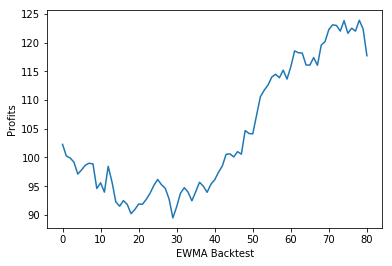

In [131]:
length = len(results)
timesteps = [j for j in range(length)]
plt.plot(timesteps, results)
plt.xlabel('EWMA Backtest')
plt.ylabel('Profits')

In [ ]:
#test on random subsets of S&P
#do a backtest on moving average 
#get industry leaders from emily